In [1]:
import os
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [2]:
init = pd.read_csv("C:\Punyaku\Rully\Botnet/init.csv")
init2 = pd.read_csv("C:\Punyaku\Rully\Botnet/init2.csv")
init3 = pd.read_csv("C:\Punyaku\Rully\Botnet/init3.csv")
init4 = pd.read_csv("C:\Punyaku\Rully\Botnet/init4.csv")
init5 = pd.read_csv("C:\Punyaku\Rully\Botnet/init5.csv")
dns1 = pd.read_csv("C:\Punyaku\Rully\Botnet/dns_application_2017_1.csv")
dns = pd.read_csv("C:\Punyaku\Rully\Botnet/dns_application_2017.csv")
appdns = pd.read_csv("C:\Punyaku\Rully\Botnet/applicationDNS.csv")

c:\Punyaku\Rully\Botnet\Botnet_Detection\.conda\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Punyaku\Rully\Botnet\Botnet_Detection\.conda\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_botnet = pd.concat([init, init2, init3, init4, init5])
df_normal = pd.concat([dns1, dns, appdns])

# READ

In [4]:
df_normal.head()

,_path,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,geo.orig.region,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id
0,conn,2017-06-22T02:33:10.688579Z,CY0VMc1fQcoWR3QKw7,192.168.50.60,137,192.168.50.255,137,udp,dns,1.499129s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:UkroHSs8STF2pM8UdWxWR0R6OD8=
1,conn,2017-06-22T02:32:37.468717Z,Cht3HLL3Moraks302,192.168.50.51,137,192.168.50.255,137,udp,dns,1.487366s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:bDbXDEXMRBw5v0ieUEGUSeVPiDY=
2,conn,2017-06-22T02:32:12.776697Z,CyjMmB2D1shaHKn72g,192.168.50.57,137,192.168.50.255,137,udp,dns,1.495538s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:JQX2G/xW3VgPHL3rw1MFNz+eTg8=
3,conn,2017-06-22T02:31:44.513718Z,CkcOml4Aww3gTnhGya,192.168.50.55,137,192.168.50.255,137,udp,dns,1.486681s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:oenZbl3W2wbLPK4Bu5IfR9YhNoA=
4,conn,2017-06-22T02:31:30.645201Z,Ca71arJpfnolxVaLf,192.168.50.60,138,192.168.50.255,138,udp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:L/9eqKhmc/yIjCbA/whb87dxmhg=


In [5]:
df_botnet.head()

,_path,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,geo.orig.region,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id
0,conn,2017-04-25T00:01:24.221943Z,CcRRUf4FvYVy0WM1tf,192.168.50.15,49204,192.168.50.88,53,udp,dns,206us,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:o9DmB+Xdg3mjcpAWPAa4xMSQ8PA=
1,conn,2017-04-25T00:01:05.437399Z,CskjGr1swnXFezlM0b,fe80::d58e:a29a:c48:dd8f,135,ff02::1:ff98:c06b,136,icmp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:/3BVcTgZBvIwH3NdRMIuCTKDsco=
2,conn,2017-04-25T00:01:05.435065Z,CAnrobD8Gp6TJUHkc,fe80::2c51:b7cc:8a98:c06b,135,ff02::1:ff48:dd8f,136,icmp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:4pI7NSr1zcExpnwgrplWKhUeX2Y=
3,conn,2017-04-25T00:01:05.361443Z,CP4uAC4tn9VWjhJWu7,192.168.50.18,51400,224.0.0.252,5355,udp,dns,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:qmfbUmATO8xesLDLONvCq/Hw0hs=
4,conn,2017-04-25T00:01:05.36117Z,CmQVh52Dk2zV5D9hgj,fe80::d58e:a29a:c48:dd8f,63788,ff02::1:3,5355,udp,dns,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:1O9I3C6IMbR1/6T8NUA+v6rvntU=


# Labelling

In [6]:
df_normal['label'] = 'Normal'
df_botnet['label'] = 'Botnet'

# Filtering By Times

In [7]:
df_normal['ts'] = pd.to_datetime(df_normal['ts'])

df_botnet['ts'] = df_botnet['ts'].str.replace('Z', '')  # Remove 'Z' from the timestamp string
try:
    df_botnet['ts'] = pd.to_datetime(df_botnet['ts'], format="%Y-%m-%dT%H:%M:%S")
except ValueError:
    df_botnet['ts'] = pd.to_datetime(df_botnet['ts'], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')


In [8]:
df_normal['time'] = df_normal['ts'].dt.strftime('%H:%M:%S')
df_normal['date'] = df_normal['ts'].dt.strftime('%Y-%m-%d')

df_botnet['time'] = df_botnet['ts'].dt.strftime('%H:%M:%S')
df_botnet['date'] = df_botnet['ts'].dt.strftime('%Y-%m-%d')

In [9]:
df_normal.insert(2, 'time', df_normal.pop('time'))
df_normal.insert(3, 'date', df_normal.pop('date'))

df_botnet.insert(2, 'time', df_botnet.pop('time'))
df_botnet.insert(3, 'date', df_botnet.pop('date'))

In [10]:
df_normal = df_normal.sort_values(['date', 'time'], ascending=True)

df_botnet = df_botnet.sort_values(['date', 'time'], ascending=True)

In [11]:
df_normal.head()

,_path,ts,time,date,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,...,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id,label
298,conn,2017-06-13 01:57:38.658640+00:00,01:57:38,2017-06-13,C1qVrt3a6cLOeBTxx2,192.168.50.51,61485,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:wCKQp2nV3OJvKUWkJxYMV1y5Zmw=,Normal
296,conn,2017-06-13 01:57:39.365021+00:00,01:57:39,2017-06-13,CqvrX029jPSJJseFW4,192.168.50.88,51316,8.8.4.4,53,udp,...,NaN,NaN,NaN,US,NaN,NaN,37.751,-97.822,1:PNu0goJ1FjGRydc/UbZQU7z4izg=,Normal
297,conn,2017-06-13 01:57:39.364588+00:00,01:57:39,2017-06-13,C5FyKT1tF02psaoWg9,192.168.50.19,60019,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:b041F23994Qmbo0E+76IpF7JCtw=,Normal
294,conn,2017-06-13 01:57:40.657703+00:00,01:57:40,2017-06-13,CWEiHh1SShNqzp0RK,192.168.50.51,59936,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:mxTfjGcQ4NKXLMjdY95cDBaTv90=,Normal
295,conn,2017-06-13 01:57:40.283348+00:00,01:57:40,2017-06-13,C4gcHS2lYNRehzDjGe,192.168.50.51,55221,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:YsCB+scJ8ppWcpZij0CAENJQ9ds=,Normal


In [12]:
df_botnet.head()

,_path,ts,time,date,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,...,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id,label
44657,conn,2017-04-19 02:54:16.972588,02:54:16,2017-04-19,CxJk7F6UdwzSTe1Sk,192.168.50.11,58620,239.255.255.250,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:69wLfIDkiwGxVaCOxbc9Zzkdj1g=,Botnet
44658,conn,2017-04-19 02:54:16.971992,02:54:16,2017-04-19,CcjJ5P16TDfqrGeq3c,fe80::891f:ff8f:8660:beff,58618,ff02::c,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:hXgaW+IATJ3548l0uRPdSY/NaYA=,Botnet
270428,conn,2017-04-19 02:54:16.972588,02:54:16,2017-04-19,CfjRDf1MBW2erp4tyd,192.168.50.11,58620,239.255.255.250,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:69wLfIDkiwGxVaCOxbc9Zzkdj1g=,Botnet
270429,conn,2017-04-19 02:54:16.971992,02:54:16,2017-04-19,CjoXX82ODGPpqAYTRj,fe80::891f:ff8f:8660:beff,58618,ff02::c,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:hXgaW+IATJ3548l0uRPdSY/NaYA=,Botnet
44655,conn,2017-04-19 02:54:19.193546,02:54:19,2017-04-19,CAh3vw2cvv87Z0efx,192.168.50.14,55154,239.255.255.250,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:o8LjmI2J3H3JSezvkWoV3LVa6xg=,Botnet


# Drop Unused Column

In [13]:
df_normal = df_normal.drop(['geo.orig.country_code','geo.orig.region','geo.orig.city',
              'geo.resp.latitude','geo.resp.longitude','geo.orig.latitude',
              'tunnel_parents','geo.orig.longitude','geo.resp.country_code',
              'geo.resp.region','geo.resp.city','local_orig','local_resp'], axis=1)


df_botnet = df_botnet.drop(['geo.orig.country_code','geo.orig.region','geo.orig.city',
              'geo.resp.latitude','geo.resp.longitude','geo.orig.latitude',
              'tunnel_parents','geo.orig.longitude','geo.resp.country_code',
              'geo.resp.region','geo.resp.city','local_orig','local_resp'], axis=1)

# Handling Missing Value

In [15]:
#Replace With Mean
def replace_missing_with_mean(df, columns):
    #Count mean in column
    mean_values = df[columns].mean()
    
    # Replace missing value with mean
    df[columns] = df[columns].fillna(mean_values)
    
    return df

#Replace With Median
def replace_missing_with_median(df, columns):
    #Get Median in column
    median_values = df[columns].median()
    
    # Replace missing value with median
    df[columns] = df[columns].fillna(median_values)
    
    return df

#Replace with Mode
def replace_missing_with_mode(df, columns):
    #Get Mode Value in Column
    mode_values = df[columns].mode().iloc[0]
    
    # Replace missing value with median
    df[columns] = df[columns].fillna(mode_values)
    
    return df

#Replace with 0 Value
def replace_missing_with_zero(df, columns):
    #Zero Value
    zero_value = 0
    
    # Replace missing value with median
    df[columns] = df[columns].fillna(zero_value)
    
    return df

def replace_missing_with_previous_row(df, column):

    df[column].fillna(method='ffill', inplace=True)
    
    return df

## Drop Missing Value In Duration

In [16]:
df_normal = df_normal.dropna(subset=['duration'])

df_botnet = df_botnet.dropna(subset=['duration'])

## Handling Missing Value With Previous Row

In [17]:
df_normal = replace_missing_with_previous_row(df_normal, 'service')
df_normal = replace_missing_with_previous_row(df_normal, 'orig_bytes')
df_normal = replace_missing_with_previous_row(df_normal, 'resp_bytes')
df_normal = replace_missing_with_previous_row(df_normal, 'history')


df_botnet = replace_missing_with_previous_row(df_botnet, 'service')
df_botnet = replace_missing_with_previous_row(df_botnet, 'orig_bytes')
df_botnet = replace_missing_with_previous_row(df_botnet, 'resp_bytes')
df_botnet = replace_missing_with_previous_row(df_botnet, 'history')

In [18]:
missing = pd.isnull(df_normal).sum()
missing

_path            0
ts               0
time             0
date             0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
community_id     0
label            0
dtype: int64

In [21]:
df_botnet = replace_missing_with_previous_row(df_botnet, 'service')

In [22]:
missing = pd.isnull(df_botnet).sum()
missing

_path             0
ts                0
time              0
date              0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service          36
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
community_id      0
label             0
dtype: int64

In [23]:
df_botnet = df_botnet.dropna(subset=['service'])

In [24]:
pd.isnull(df_botnet).sum()

_path            0
ts               0
time             0
date             0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
community_id     0
label            0
dtype: int64

# Merge Dataframe Normal & Botnet

In [25]:
df = pd.concat([df_botnet,df_normal])
df

,_path,ts,time,date,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,...,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,community_id,label
44629,conn,2017-04-19 03:02:58.018252,03:02:58,2017-04-19,CQ5LIk3ALzjX5SQdah,192.168.50.88,37890,142.104.64.203,1922,tcp,...,2223.0,SF,0,ShADadFf,19,2921,18,3167,1:FHcgw0DRDUkWdQWX2ckx+VBYIR4=,Botnet
270400,conn,2017-04-19 03:02:58.018252,03:02:58,2017-04-19,C1DIHQ2QCOJ9GLkWc2,192.168.50.88,37890,142.104.64.203,1922,tcp,...,2223.0,SF,0,ShADadFf,19,2921,18,3167,1:FHcgw0DRDUkWdQWX2ckx+VBYIR4=,Botnet
44628,conn,2017-04-19 03:03:22.345278,03:03:22,2017-04-19,CXCYO01cFAOURi14w9,fe80::d58e:a29a:c48:dd8f,546,ff02::1:2,547,udp,...,0.0,S0,0,D,7,973,0,0,1:hBhE2ZQ6mkjyQ7enfKelPcc668k=,Botnet
270399,conn,2017-04-19 03:03:22.345278,03:03:22,2017-04-19,CTPHiOxhjbmwk6Yj5,fe80::d58e:a29a:c48:dd8f,546,ff02::1:2,547,udp,...,0.0,S0,0,D,7,973,0,0,1:hBhE2ZQ6mkjyQ7enfKelPcc668k=,Botnet
44627,conn,2017-04-19 03:03:24.369288,03:03:24,2017-04-19,CvHpwH3ORu8EOrKz0d,192.168.50.88,37892,142.104.64.203,1922,tcp,...,2171.0,SF,0,ShADadFf,17,2669,16,3011,1:PPQaDVS78HfscnudgpLSN4BctrE=,Botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,conn,2017-06-22 02:31:18.910432+00:00,02:31:18,2017-06-22,CiirRXKde30MJmKH9,192.168.50.54,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:xYIOMqjOrJmPCT1lKoPiXQSXrDU=,Normal
3,conn,2017-06-22 02:31:44.513718+00:00,02:31:44,2017-06-22,CkcOml4Aww3gTnhGya,192.168.50.55,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:oenZbl3W2wbLPK4Bu5IfR9YhNoA=,Normal
2,conn,2017-06-22 02:32:12.776697+00:00,02:32:12,2017-06-22,CyjMmB2D1shaHKn72g,192.168.50.57,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:JQX2G/xW3VgPHL3rw1MFNz+eTg8=,Normal
1,conn,2017-06-22 02:32:37.468717+00:00,02:32:37,2017-06-22,Cht3HLL3Moraks302,192.168.50.51,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:bDbXDEXMRBw5v0ieUEGUSeVPiDY=,Normal


# Ekstraksi Fitur

### Handling Duration Data

In [26]:
short_values = [value for value in df['duration'] if len(value) < 5]
print(short_values)

['96us', '96us', '96us', '96us', '94us', '94us', '98us', '98us', '98us', '98us', '99us', '99us', '84us', '84us', '99us', '99us', '90us', '90us', '83us', '83us', '80us', '80us', '99us', '99us', '80us', '80us', '99us', '99us', '94us', '94us', '94us', '94us', '87us', '87us', '99us', '99us', '79us', '79us', '97us', '97us', '41us', '41us', '70us', '95us', '70us', '95us', '66us', '66us', '63us', '98us', '63us', '98us', '78us', '78us', '87us', '87us', '84us', '84us', '94us', '94us', '82us', '82us', '67us', '67us', '75us', '75us', '90us', '90us', '72us', '72us', '95us', '95us', '99us', '99us', '98us', '98us', '99us', '99us', '97us', '97us', '97us', '97us', '95us', '95us', '80us', '80us', '95us', '95us', '98us', '98us', '98us', '98us', '89us', '89us', '95us', '95us', '98us', '98us', '80us', '80us', '99us', '99us', '95us', '95us', '96us', '96us', '99us', '99us', '93us', '93us', '97us', '97us', '91us', '91us', '95us', '95us', '96us', '96us', '83us', '83us', '99us', '99us', '91us', '91us', '81us',

In [27]:
print(df['duration'])

44629      24.437321s
270400     24.437321s
44628     1m2.995895s
270399    1m2.995895s
44627      14.908373s
             ...     
5           1.493839s
3           1.486681s
2           1.495538s
1           1.487366s
0           1.499129s
Name: duration, Length: 1302998, dtype: object


In [28]:
def process_time_string(time_string):
    time_unit = time_string[-2:]
    time_unit_s = time_string[-1:]
    time_value = time_string.replace('.', '')
    time_value_new = time_string.replace('.', '')
    time_value_new2 = time_string.replace('.', '')
    time_value_new3 = time_string.replace('.', '')
    if time_string.strip():
        if len(time_string) > 4:
            if time_string[1] == 'm':
                time_value = float(time_string[0]) * 60
                # time_value_new = time_value_new[2:]
                if time_unit == 'ms':
                    time_value_new = float(time_string[2:].replace('ms', '')) / 1000
                    time_total = time_value + time_value_new
                    return time_total
                elif time_unit == 'us':
                    time_value_new = float(time_string[2:].replace('us', '')) / 1000000
                    time_total = time_value + time_value_new
                    return time_total 
                elif time_unit_s == 's':
                    time_value_new = float(time_string[2:].replace('s', '')) 
                    time_total = time_value + time_value_new
                    return time_total
            elif time_string[2] == 'm':
                time_value = float(time_string[0]) * 60 * 10 + float(time_string[1]) * 60
                # time_value_new = time_string.replace('m', '')
                if time_unit == 'ms':
                    time_value_new = float(time_string[3:].replace('ms', '')) / 1000
                    time_total = time_value + time_value_new
                    return time_total
                elif time_unit == 'us':
                    time_value_new = float(time_string[3:].replace('us', '')) / 1000000
                    time_total = time_value + time_value_new
                    return time_total 
                elif time_unit_s == 's':
                        time_value_new = float(time_string[3:].replace('s', ''))
                        time_total = time_value + time_value_new
                        return time_total
            elif time_string[1] == 'd':
                time_value = float(time_string[0]) * 86400
                if time_string[3] == 'h':
                    time_value_new = float(time_string[2]) * 3600
                    if time_string[5] == 'm':
                        time_value_new2 = float(time_string[4]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[6:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[6:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[6:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[6] == 'm':
                        time_value_new2 = float(time_string[4]) * 60 * 10 + float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[7:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                elif time_string[4] == 'h':
                    time_value_new = float(time_string[2]) * 3600 * 10 + float(time_string[3]) * 3600
                    if time_string[6] == 'm':
                        time_value_new2 = float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[7:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[7] == 'm':
                        time_value_new2 = float(time_string[5]) * 60 * 10 + float(time_string[6]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[8:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[8:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[8:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
            elif time_string[2] == 'd':
                time_value = float(time_string[0]) * 86400 * 10 + float(time_string[1]) *86400
                if time_string[4] == 'h':
                    time_value_new = float(time_string[3]) * 3600
                    if time_string[6] == 'm':
                        time_value_new2 = float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[7] == 'm':
                        time_value_new2 = float(time_string[5]) * 60 * 10 + float(time_string[6]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[8:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[8:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                elif time_string[5] == 'h':
                    time_value_new = float(time_string[3]) * 3600 * 10 + float(time_string[4]) * 3600
                    if time_string[6] == 'm':
                        time_value_new2 = float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[7] == 'm':
                        time_value_new2 = float(time_string[5]) * 60 * 10 + float(time_string[6]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
            elif time_unit == 'ms':
                time_value = float(time_string.replace('ms', '')) / 1000
                return time_value
            elif time_unit == 'us':
                time_value = float(time_string.replace('us', '')) / 1000000
                return time_value
            elif time_unit_s == 's':
                time_value = float(time_string.replace('s', ''))
                return time_value
            else:
                return time_value
        else: 
            if time_unit == 'ms':
                time_value = float(time_string.replace('ms', '')) / 1000
                return time_value
            elif time_string[1] == 'm':
                time_value = float(time_string[0]) * 60
                # time_value_new = time_value_new[2:]
                if time_unit == 'ms':
                    time_value_new = float(time_string[2:].replace('ms', '')) / 1000
                    time_total = time_value + time_value_new
                    return time_total
                elif time_unit == 'us':
                    time_value_new = float(time_string[2:].replace('us', '')) / 1000000
                    time_total = time_value + time_value_new
                    return time_total 
                elif time_unit_s == 's':
                    time_value_new = float(time_string[2:].replace('s', '')) 
                    time_total = time_value + time_value_new
                    return time_total
            elif time_unit == 'us':
                time_value = float(time_string.replace('us', '')) / 1000000
                return time_value
            elif time_unit_s == 's':
                time_value = float(time_string.replace('s', ''))
                return time_value
            else:
                return time_value
            

df['duration'] = df['duration'].apply(lambda x: process_time_string(x) if isinstance(x, str) else x)

print(df['duration'])

44629     24.437321
270400    24.437321
44628     62.995895
270399    62.995895
44627     14.908373
            ...    
5          1.493839
3          1.486681
2          1.495538
1          1.487366
0          1.499129
Name: duration, Length: 1302998, dtype: float64


In [29]:
pd.isnull(df).sum()

_path            0
ts               0
time             0
date             0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
community_id     0
label            0
dtype: int64

### Ekstraksi

In [30]:
df['PX'] = df['orig_pkts'] + df['resp_pkts']

df['NNP'] = np.where(df['orig_pkts'] + df['resp_pkts'] == 0, 1, 0)

df['NSP'] = ((63 >= df['orig_pkts'] + df['resp_pkts']) & (df['orig_pkts'] + df['resp_pkts'] <= 400)).astype(int)

df['PSP'] = df['NSP'] / df['PX'] 

df['IOPR'] = df['orig_pkts'] + df['resp_pkts']

df['reconnection'] = np.where(df['history'].str.contains('Sr%'), 1, 0)
df['reconnection'] = df['reconnection'].fillna(0).astype(int)

df['FPS'] = df['orig_ip_bytes'] / df['orig_pkts']
df['FPS'] = df['FPS'].fillna(0)

df['TBT'] = df['orig_ip_bytes'] + df['resp_ip_bytes']

df['APL'] = (df['orig_ip_bytes'] + df['resp_ip_bytes']) / df['PX']

df['BS'] = ((df['orig_ip_bytes']+ df['resp_ip_bytes'])* 8 ) / df['duration']

df['PS'] =(df['orig_pkts'] + df['resp_pkts']) / df['duration'] 

df['PPS'] = (df['orig_pkts'] + df['resp_pkts']) / df['duration'] 

# Normalisasi Data

In [31]:
# Normalisasi
sc = MinMaxScaler(feature_range=(0, 1))

#Reset Index untuk duplikasi
dfnew = df
df = df.reset_index(drop=True)

# Apply the Min-Max Scaler to the numerical columns
dfnew = pd.DataFrame(data=sc.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

#duplikasi label
dfnew['label'] = df['label']


In [32]:
pd.isnull(dfnew).sum()

id.orig_p        0
id.resp_p        0
duration         0
orig_bytes       0
resp_bytes       0
missed_bytes     0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
PX               0
PSP              0
IOPR             0
FPS              0
TBT              0
APL              0
BS               0
PS               0
PPS              0
label            0
dtype: int64

# Shuffle Row

In [33]:
dfnew = dfnew.sample(frac=1).reset_index(drop=True)
dfnew

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,PX,PSP,IOPR,FPS,TBT,APL,BS,PS,PPS,label
0,0.834707,0.108571,6.128550e-06,4.442230e-06,0.000000,0.0,0.000184,5.425191e-06,0.00000,0.000000,0.000123,0.333333,0.000123,0.006772,4.819812e-06,0.006951,4.648796e-07,4.850812e-07,4.850812e-07,Botnet
1,0.008286,0.031257,6.440677e-05,3.803361e-06,0.000000,0.0,0.000215,5.788060e-06,0.00000,0.000000,0.000153,0.285714,0.000153,0.006192,5.181002e-06,0.006074,3.903302e-08,4.017253e-08,4.017253e-08,Botnet
2,0.841589,0.108571,6.131768e-06,4.442230e-06,0.000000,0.0,0.000184,5.425191e-06,0.00000,0.000000,0.000123,0.333333,0.000123,0.006772,4.819812e-06,0.006951,4.646308e-07,4.848185e-07,4.848185e-07,Botnet
3,0.910456,0.003029,1.022427e-05,9.792012e-07,0.000015,0.0,0.000123,1.641834e-06,0.00006,0.000025,0.000092,0.400000,0.000092,0.003074,1.462523e-06,0.001350,9.838876e-08,2.346026e-07,2.346026e-07,Botnet
4,0.002045,0.007829,1.533009e-06,8.956109e-07,0.000000,0.0,0.000092,1.391990e-06,0.00000,0.000000,0.000031,0.666667,0.000031,0.003475,8.052757e-07,0.001957,4.770754e-07,9.849784e-07,9.849784e-07,Botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302993,0.964170,0.306000,1.113309e-07,2.627125e-07,0.000000,0.0,0.000061,5.948674e-07,0.00000,0.000000,0.000000,1.000000,0.000000,0.002227,1.184229e-08,0.000067,2.851714e-06,9.167773e-06,9.167773e-06,Botnet
1302994,0.933208,0.306000,1.010049e-07,2.627125e-07,0.000000,0.0,0.000061,8.328144e-07,0.00000,0.000000,0.000000,1.000000,0.000000,0.003118,2.486881e-07,0.001417,4.405483e-06,1.010658e-05,1.010658e-05,Botnet
1302995,0.864112,0.003029,2.269682e-10,2.030051e-07,0.000044,0.0,0.000031,3.688178e-07,0.00006,0.000053,0.000000,1.000000,0.000000,0.002762,6.513259e-07,0.003712,2.905709e-03,4.484290e-03,4.484290e-03,Botnet
1302996,0.907618,0.003029,1.022421e-05,1.044879e-06,0.000013,0.0,0.000153,1.873832e-06,0.00006,0.000023,0.000123,0.333333,0.000123,0.002807,1.657921e-06,0.000945,1.086694e-07,2.846020e-07,2.846020e-07,Botnet


### Data Keseluruhan

In [34]:
from sklearn.model_selection import train_test_split
X = dfnew.drop('label', axis=1)
y = dfnew['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,PX,PSP,IOPR,FPS,TBT,APL,BS,PS,PPS
0,0.834707,0.108571,6.128550e-06,4.442230e-06,0.000000,0.0,0.000184,5.425191e-06,0.00000,0.000000,0.000123,0.333333,0.000123,0.006772,4.819812e-06,0.006951,4.648796e-07,4.850812e-07,4.850812e-07
1,0.008286,0.031257,6.440677e-05,3.803361e-06,0.000000,0.0,0.000215,5.788060e-06,0.00000,0.000000,0.000153,0.285714,0.000153,0.006192,5.181002e-06,0.006074,3.903302e-08,4.017253e-08,4.017253e-08
2,0.841589,0.108571,6.131768e-06,4.442230e-06,0.000000,0.0,0.000184,5.425191e-06,0.00000,0.000000,0.000123,0.333333,0.000123,0.006772,4.819812e-06,0.006951,4.646308e-07,4.848185e-07,4.848185e-07
3,0.910456,0.003029,1.022427e-05,9.792012e-07,0.000015,0.0,0.000123,1.641834e-06,0.00006,0.000025,0.000092,0.400000,0.000092,0.003074,1.462523e-06,0.001350,9.838876e-08,2.346026e-07,2.346026e-07
4,0.002045,0.007829,1.533009e-06,8.956109e-07,0.000000,0.0,0.000092,1.391990e-06,0.00000,0.000000,0.000031,0.666667,0.000031,0.003475,8.052757e-07,0.001957,4.770754e-07,9.849784e-07,9.849784e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302993,0.964170,0.306000,1.113309e-07,2.627125e-07,0.000000,0.0,0.000061,5.948674e-07,0.00000,0.000000,0.000000,1.000000,0.000000,0.002227,1.184229e-08,0.000067,2.851714e-06,9.167773e-06,9.167773e-06
1302994,0.933208,0.306000,1.010049e-07,2.627125e-07,0.000000,0.0,0.000061,8.328144e-07,0.00000,0.000000,0.000000,1.000000,0.000000,0.003118,2.486881e-07,0.001417,4.405483e-06,1.010658e-05,1.010658e-05
1302995,0.864112,0.003029,2.269682e-10,2.030051e-07,0.000044,0.0,0.000031,3.688178e-07,0.00006,0.000053,0.000000,1.000000,0.000000,0.002762,6.513259e-07,0.003712,2.905709e-03,4.484290e-03,4.484290e-03
1302996,0.907618,0.003029,1.022421e-05,1.044879e-06,0.000013,0.0,0.000153,1.873832e-06,0.00006,0.000023,0.000123,0.333333,0.000123,0.002807,1.657921e-06,0.000945,1.086694e-07,2.846020e-07,2.846020e-07


## Spearmon

               id.orig_p  id.resp_p  duration  orig_bytes  resp_bytes  \
id.orig_p       1.000000  -0.218806 -0.253761   -0.240255    0.266402   
id.resp_p      -0.218806   1.000000  0.308127    0.405999   -0.783475   
duration       -0.253761   0.308127  1.000000    0.837849   -0.574317   
orig_bytes     -0.240255   0.405999  0.837849    1.000000   -0.618441   
resp_bytes      0.266402  -0.783475 -0.574317   -0.618441    1.000000   
missed_bytes         NaN        NaN       NaN         NaN         NaN   
orig_pkts      -0.323713   0.378484  0.832167    0.797792   -0.541440   
orig_ip_bytes  -0.316158   0.397683  0.814342    0.865961   -0.513550   
resp_pkts       0.304792  -0.903770 -0.370895   -0.536229    0.862431   
resp_ip_bytes   0.266411  -0.783481 -0.574123   -0.618413    0.999983   
PX             -0.313505   0.123900  0.768356    0.706227   -0.304780   
PSP             0.313505  -0.123900 -0.768356   -0.706227    0.304780   
IOPR           -0.313505   0.123900  0.768356    0.

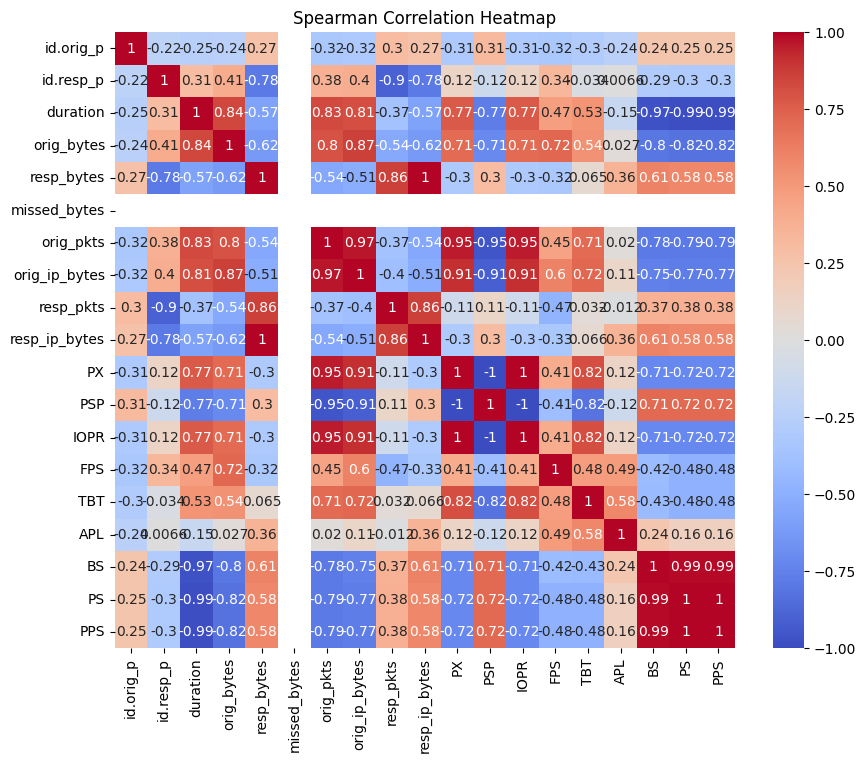

In [38]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

spearman_corr_matrix = X.corr(method='spearman')


print(spearman_corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()


## Pearson

               id.orig_p  id.resp_p  duration  orig_bytes  resp_bytes  \
id.orig_p       1.000000   0.145058 -0.012586   -0.000957    0.005100   
id.resp_p       0.145058   1.000000  0.016014    0.000789   -0.005849   
duration       -0.012586   0.016014  1.000000    0.027576   -0.000101   
orig_bytes     -0.000957   0.000789  0.027576    1.000000    0.022297   
resp_bytes      0.005100  -0.005849 -0.000101    0.022297    1.000000   
missed_bytes         NaN        NaN       NaN         NaN         NaN   
orig_pkts      -0.031615   0.013181  0.953562    0.310499    0.048410   
orig_ip_bytes  -0.001261   0.000877  0.033189    0.999984    0.022848   
resp_pkts       0.011257  -0.014621 -0.000110    0.972342    0.128319   
resp_ip_bytes   0.005555  -0.006570 -0.000103    0.107917    0.996167   
PX             -0.021047   0.004829  0.769740    0.637110    0.090080   
PSP             0.413718   0.281628 -0.012121   -0.004027   -0.013137   
IOPR           -0.021047   0.004829  0.769740    0.

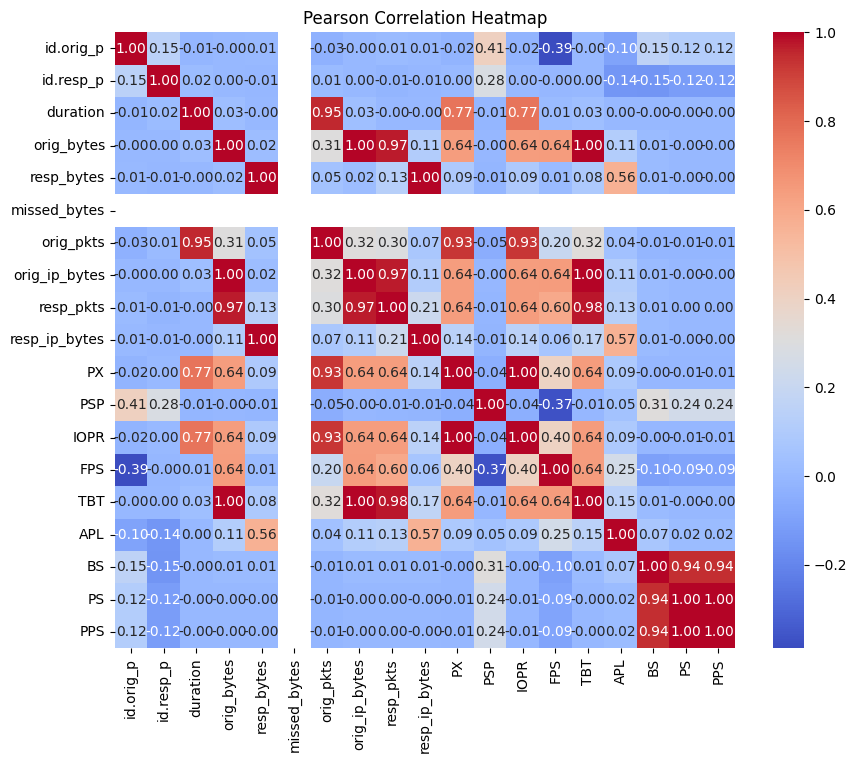

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr_matrix = X.corr()
print(pearson_corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()
